In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Análisis de tiempo de extracción por modelo de lenguaje
import seaborn as sns

In [3]:
data_path = "data/formalizacion_data.csv"

data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2016-1036.pdf,01-2016,AEG Power Solutions Ibérica Sociedad Anónima,302000.00,euros,Dirección de Abastecimiento y Transportes,Suministro,Ordinaria,Negociado sin publicidad,phi3,234.44
1,BOE-B-2016-2351.pdf,01-2016,LD Empresa de Limpieza y Desinfección S.A.U.,492471.06,euros,Departamento de Economía y Conocimiento,Servicios,Ordinaria,Abierto,phi3,669.03
2,BOE-B-2016-2508.pdf,01-2016,Oms Sacede S.A.U.,6369651.20,euros,Agencia Catalana del Agua,Servicios,Ordinaria,Abierto,phi3,232.55
3,BOE-B-2016-859.pdf,01-2016,Oracle Ibérica S.R.L.,217338.97,euros,Junta de Contratación de la Subsecretaría de F...,Servicios,Ordinaria,Negociado sin publicidad,llama3,351.18
4,BOE-B-2016-1560.pdf,01-2016,U90236837,1452077.10,euros,Instituto Nacional de la Seguridad Social,Servicios,Ordinaria,Abierto,llama3,386.32


# Descriptive analysis

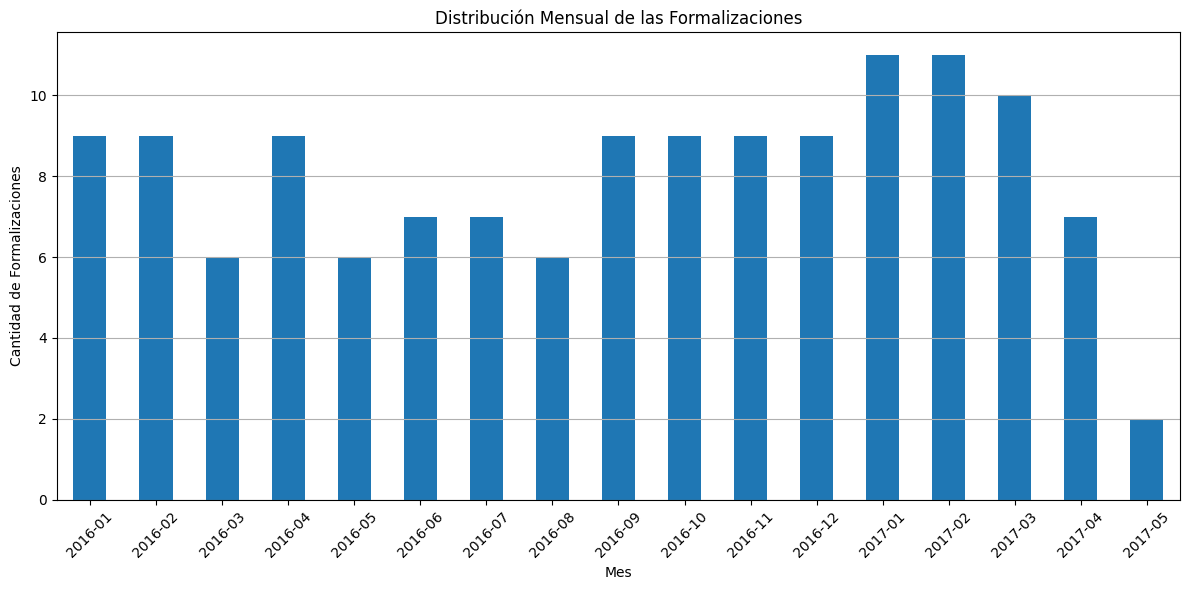

In [4]:
# Convertir la columna 'mm_yyyy' a tipo datetime
data['mm_yyyy'] = pd.to_datetime(data['mm_yyyy'], format='%m-%Y')

# Contar la cantidad de formalizaciones por mes
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Graficar la distribución mensual
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Distribución Mensual de las Formalizaciones')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Formalizaciones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

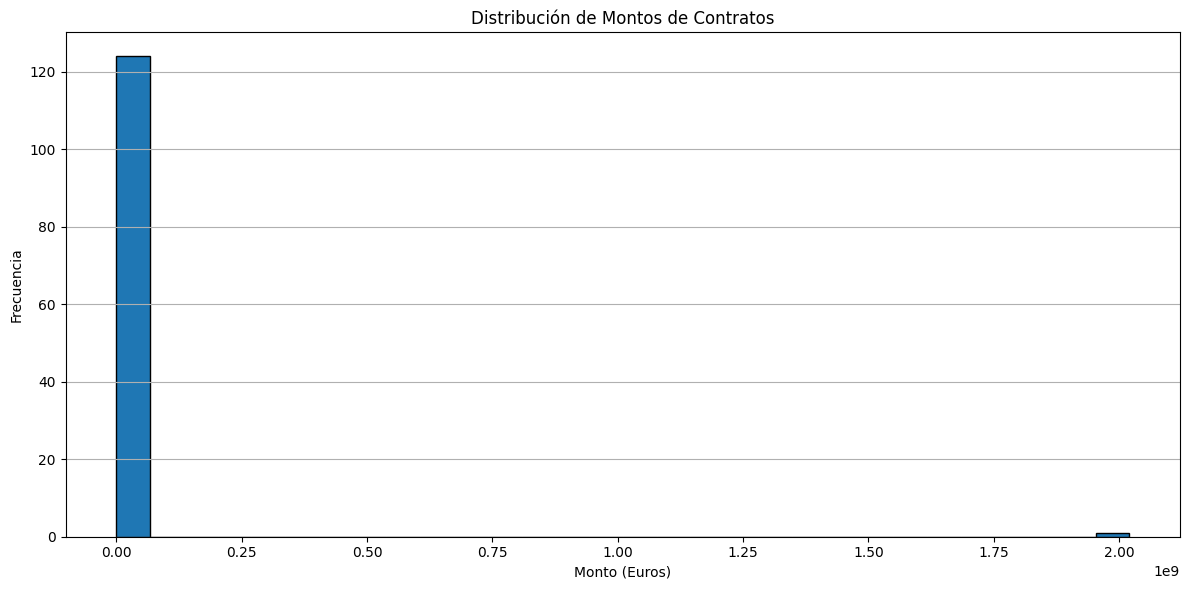

In [5]:
# Análisis 2: Distribución de Montos de Contratos
# Convertir los montos a formato numérico (asegurando que están en euros)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Descripción estadística de los montos
amount_stats = data['amount'].describe()

# Graficar la distribución de montos
plt.figure(figsize=(12, 6))
plt.hist(data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

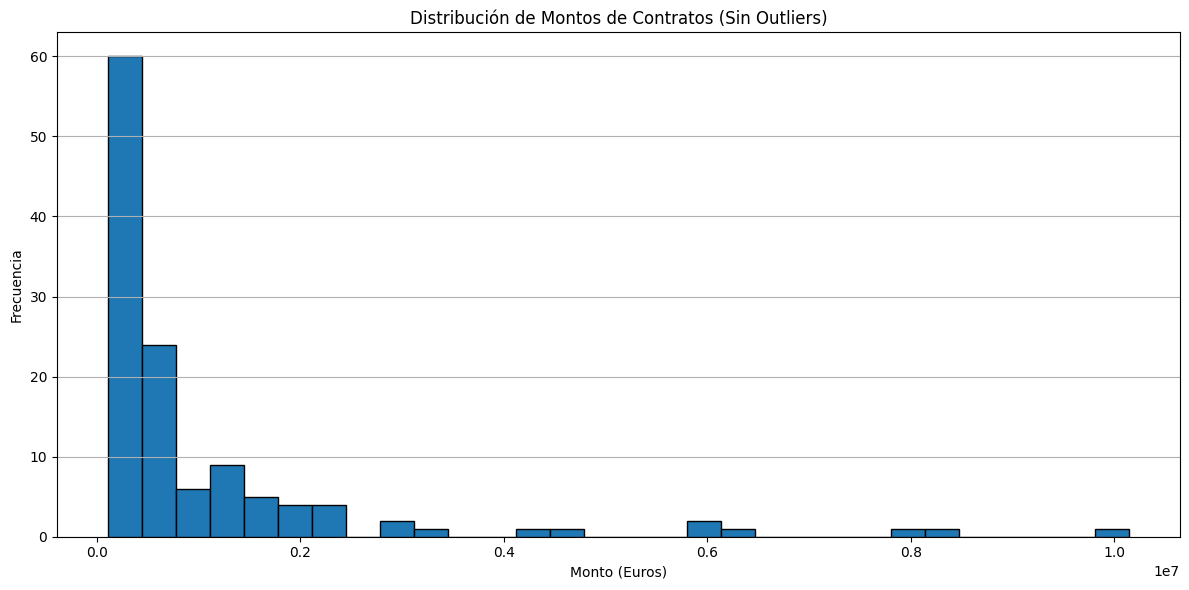

In [6]:
# Calcular el percentil 99 para identificar el outlier
percentile_99 = np.percentile(data['amount'].dropna(), 99)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_data = data[data['amount'] <= percentile_99]

# Crear una nueva gráfica sin los outliers
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos (Sin Outliers)')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Concentración de Montos:
    - La mayoría de los contratos se encuentran en el rango de 0 a 200,000 euros. Esto indica que la mayoría de las formalizaciones son de bajo a mediano valor.
  
2. Disminución Rápida:
    - Hay una disminución rápida en la frecuencia de contratos a medida que aumentan los montos. Los contratos con valores superiores a 1 millón de euros son significativamente menos frecuentes.

3. Distribución Asimétrica:
    - La distribución es asimétrica, con una cola a la derecha que sugiere la presencia de algunos contratos de mayor valor que son menos frecuentes pero impactan la media de los montos.

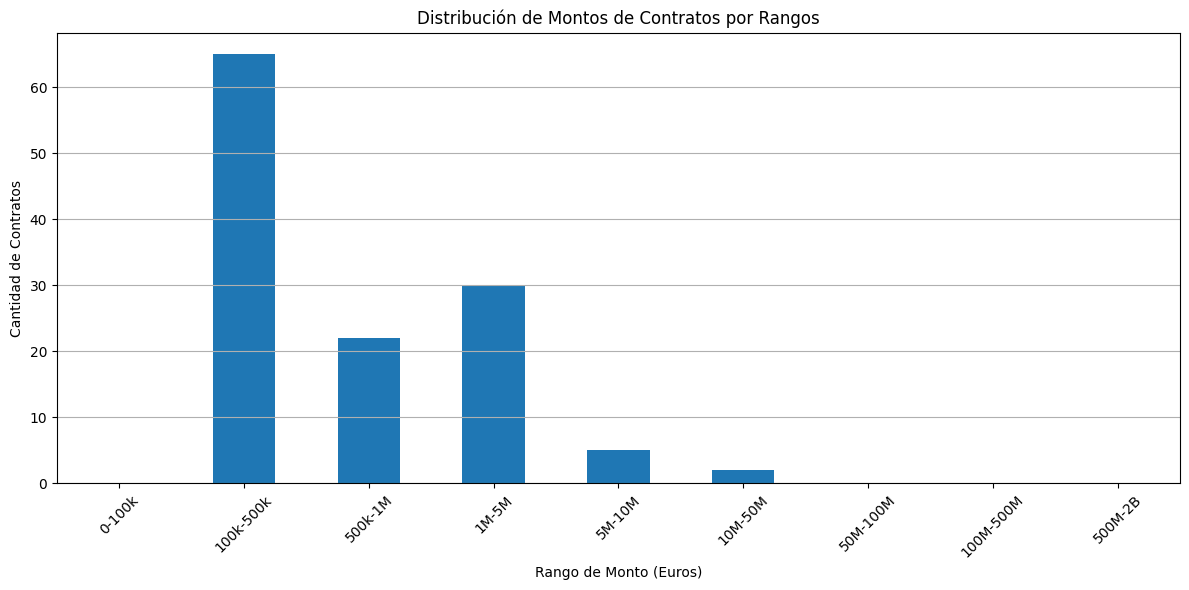

In [7]:
# Agrupar en rangos y graficar
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 2000000000]
labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-2B']
data['amount_range'] = pd.cut(data['amount'], bins=bins, labels=labels, include_lowest=True)

amount_range_counts = data['amount_range'].value_counts().sort_index()

# Graficar la distribución por rangos de montos
plt.figure(figsize=(12, 6))
amount_range_counts.plot(kind='bar')
plt.title('Distribución de Montos de Contratos por Rangos')
plt.xlabel('Rango de Monto (Euros)')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Rangos Dominantes:
    - El rango de 100,000 a 500,000 euros es el más frecuente, seguido por el rango de 500,000 a 1 millón de euros. Esto sugiere que la mayoría de los contratos se sitúan en un rango de valor moderado.
2. Poca Representación en Rangos Altos:
    - Hay muy pocos contratos en los rangos superiores a 10 millones de euros. Esto refuerza la observación de que la mayoría de las formalizaciones son de menor escala.
3. Representación Proporcional:
    - La gráfica muestra una caída progresiva en la frecuencia de contratos a medida que los montos aumentan, lo que indica una distribución que sigue una tendencia natural donde los grandes contratos son menos comunes.

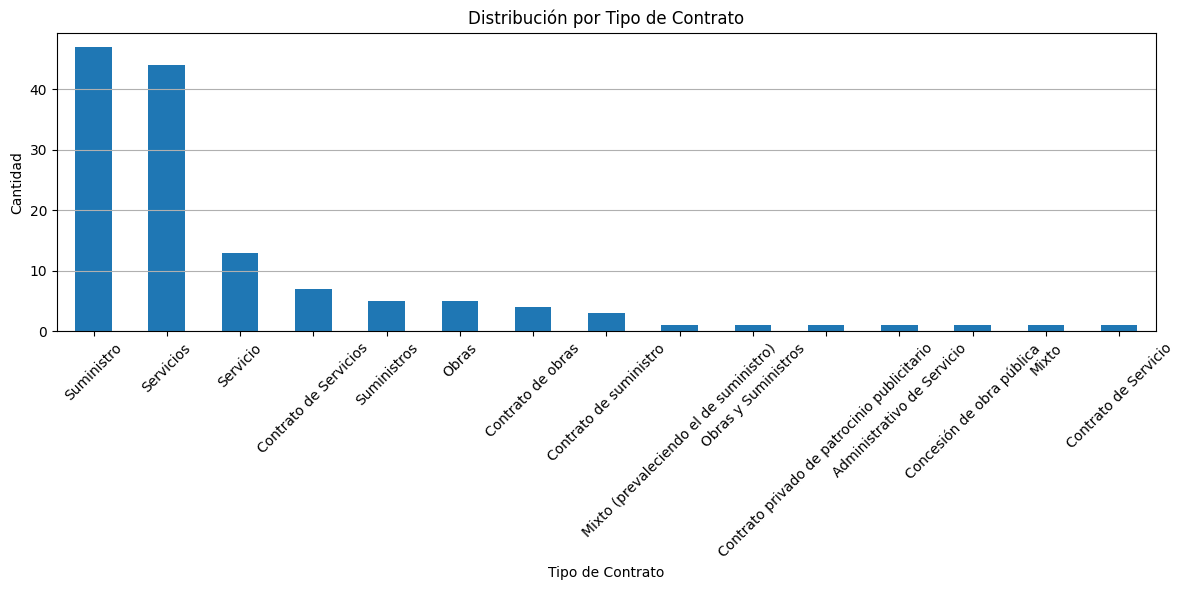

In [8]:
# Análisis 3: Análisis por Tipo de Contrato
# Contar la cantidad de cada tipo de contrato
tipo_counts = data['tipo'].value_counts()

# Graficar la distribución por tipo de contrato
plt.figure(figsize=(12, 6))
tipo_counts.plot(kind='bar')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_10895/2785069847.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


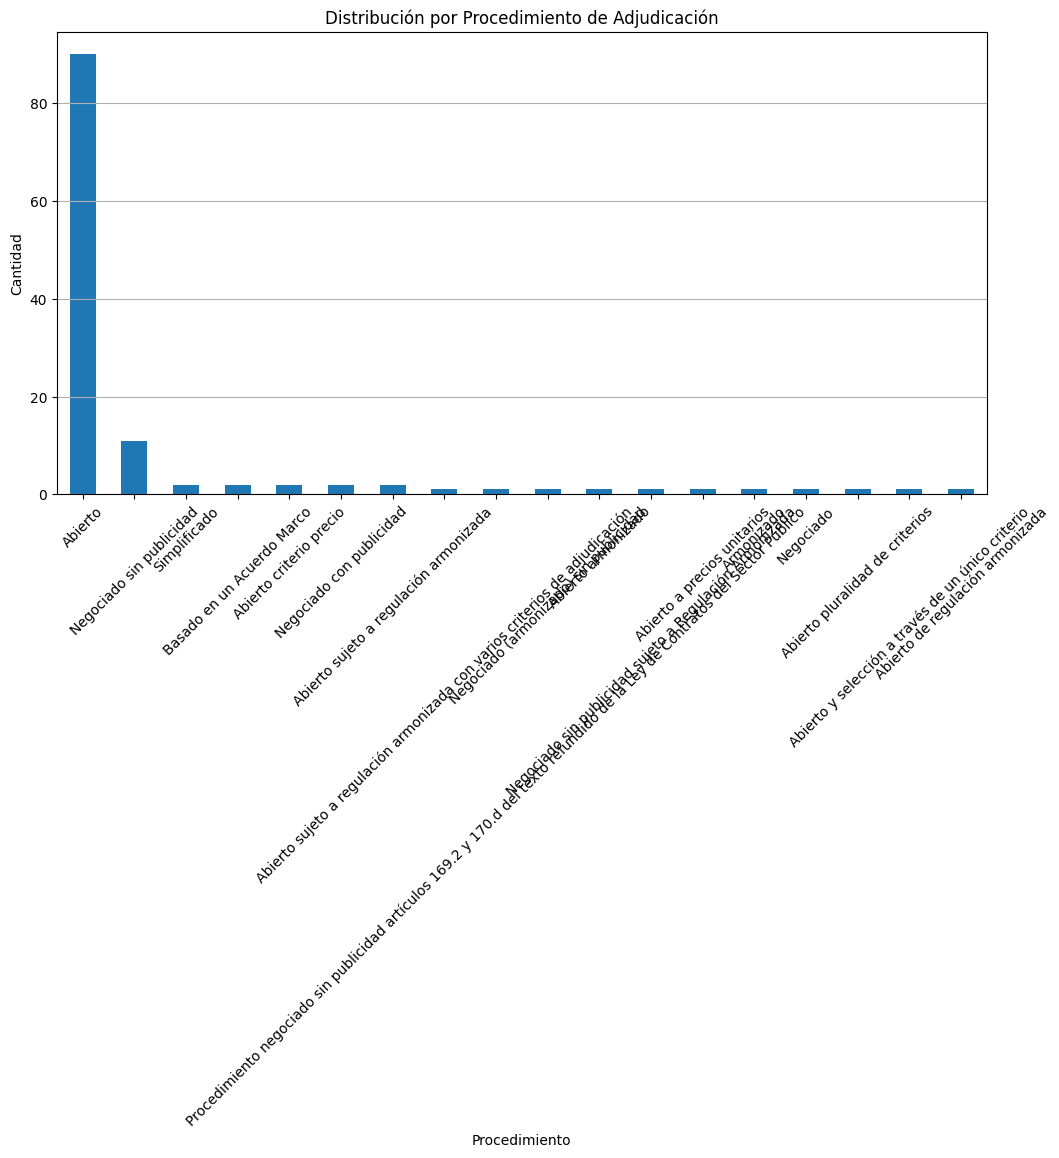

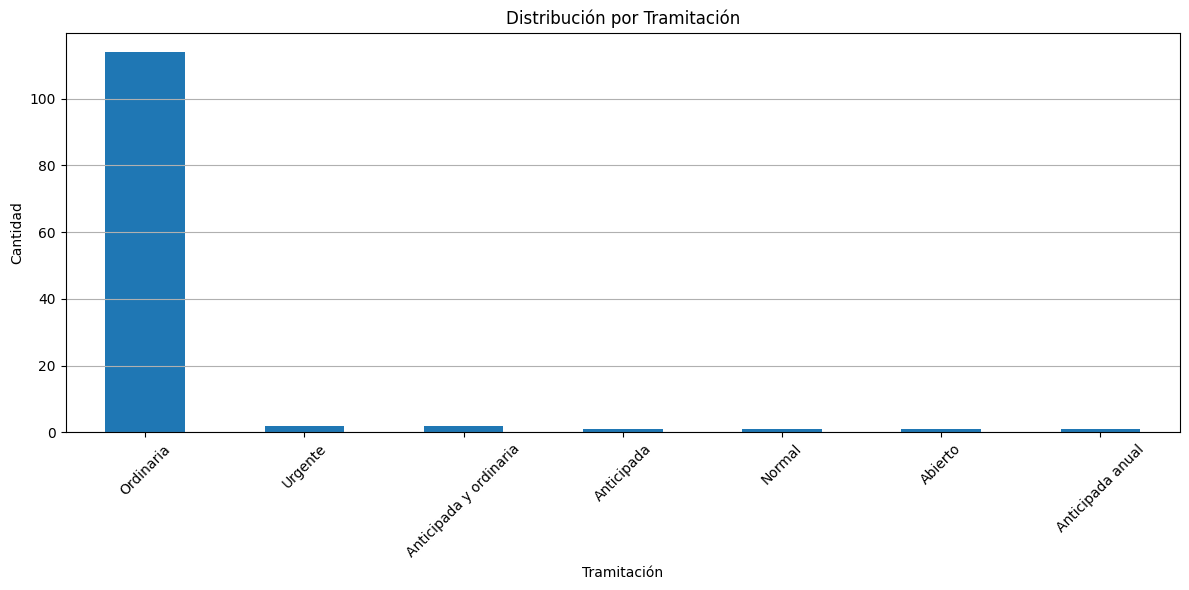

In [9]:
# Análisis 4: Procedimientos y Tramitación
# Contar la cantidad de cada procedimiento
procedimiento_counts = data['procedimiento'].value_counts()
tramitacion_counts = data['tramitacion'].value_counts()

# Graficar la distribución por procedimiento
plt.figure(figsize=(12, 6))
procedimiento_counts.plot(kind='bar')
plt.title('Distribución por Procedimiento de Adjudicación')
plt.xlabel('Procedimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Graficar la distribución por tramitación
plt.figure(figsize=(12, 6))
tramitacion_counts.plot(kind='bar')
plt.title('Distribución por Tramitación')
plt.xlabel('Tramitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

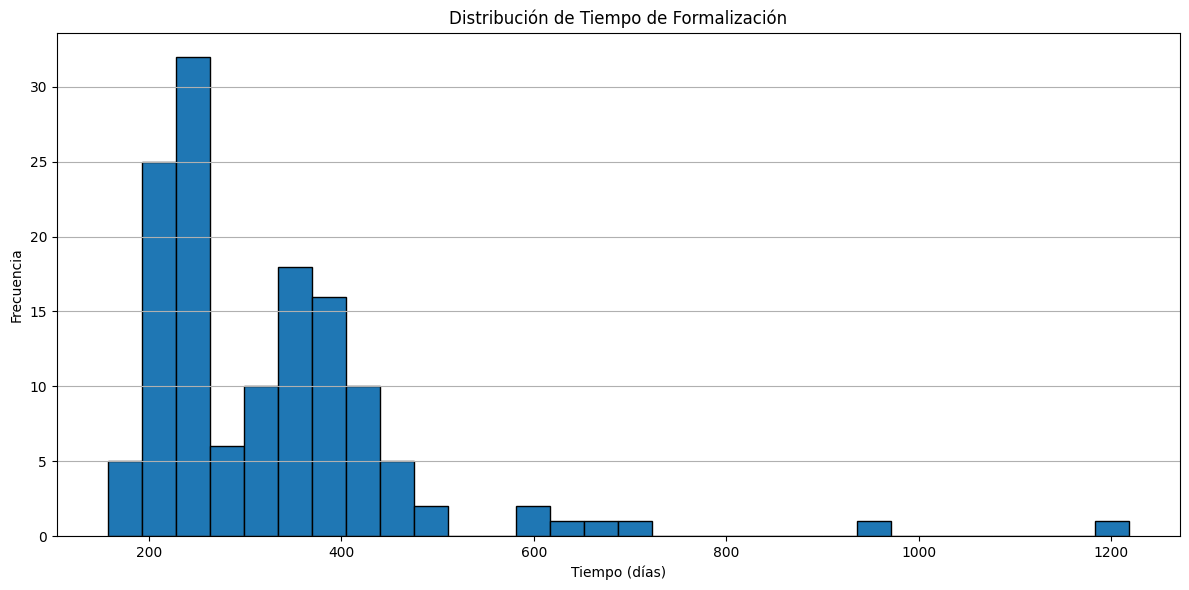

In [10]:
# Análisis 5: Tiempo de Formalización
# Descripción estadística del tiempo de formalización
data['time'] = pd.to_numeric(data['time'], errors='coerce')
time_stats = data['time'].describe()

# Graficar la distribución de tiempo de formalización
plt.figure(figsize=(12, 6))
plt.hist(data['time'], bins=30, edgecolor='black')
plt.title('Distribución de Tiempo de Formalización')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
# Mostrar estadísticas resumen
amount_stats, time_stats

(count    1.250000e+02
 mean     1.736884e+07
 std      1.806247e+08
 min      1.089000e+05
 25%      2.904000e+05
 50%      4.900500e+05
 75%      1.243265e+06
 max      2.020526e+09
 Name: amount, dtype: float64,
 count     136.000000
 mean      325.890294
 std       142.010688
 min       157.450000
 25%       230.690000
 50%       299.400000
 75%       385.645000
 max      1218.230000
 Name: time, dtype: float64)

# Temporal Analysis

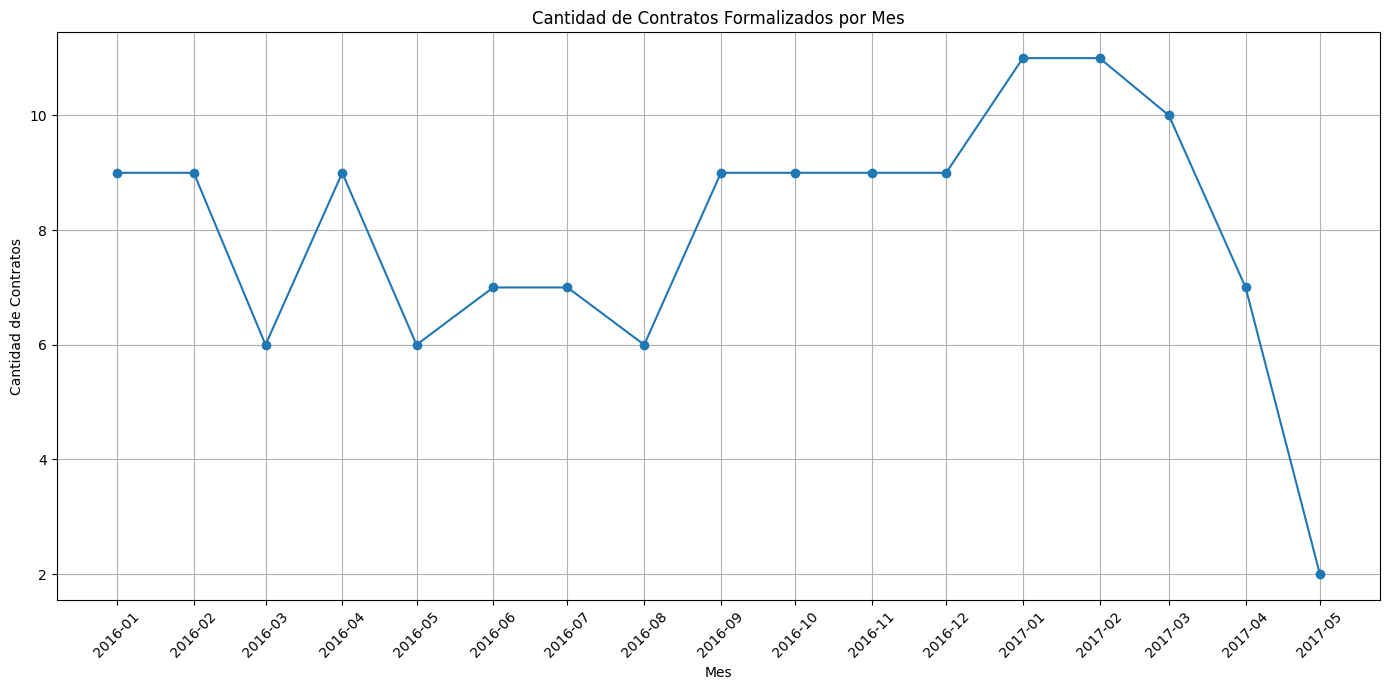

In [12]:
# Análisis temporal de la cantidad de contratos
import matplotlib.dates as mdates

# Agrupar los datos por mes y contar la cantidad de contratos
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Convertir a un formato que permita graficar
monthly_counts = monthly_counts.to_timestamp()

# Graficar la cantidad de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Cantidad de Contratos Formalizados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

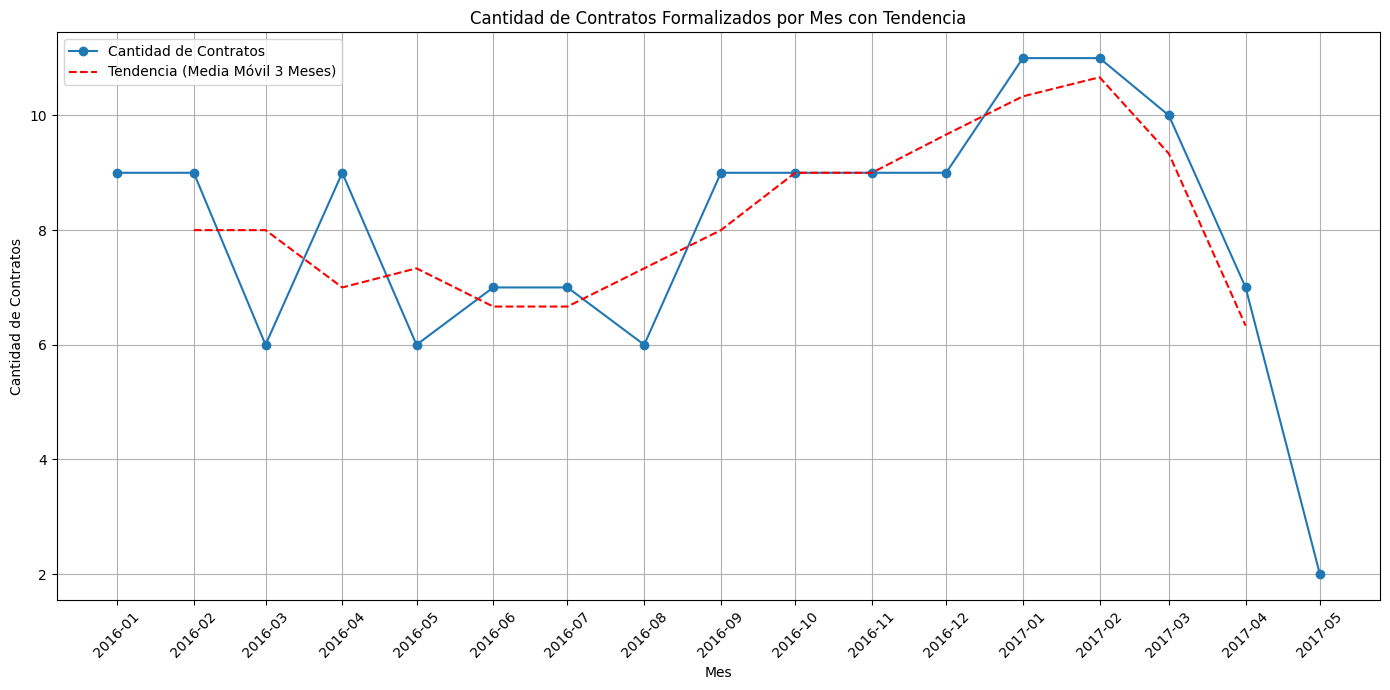

In [13]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_counts_rolling = monthly_counts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', label='Cantidad de Contratos')
plt.plot(monthly_counts_rolling.index, monthly_counts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Cantidad de Contratos Formalizados por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

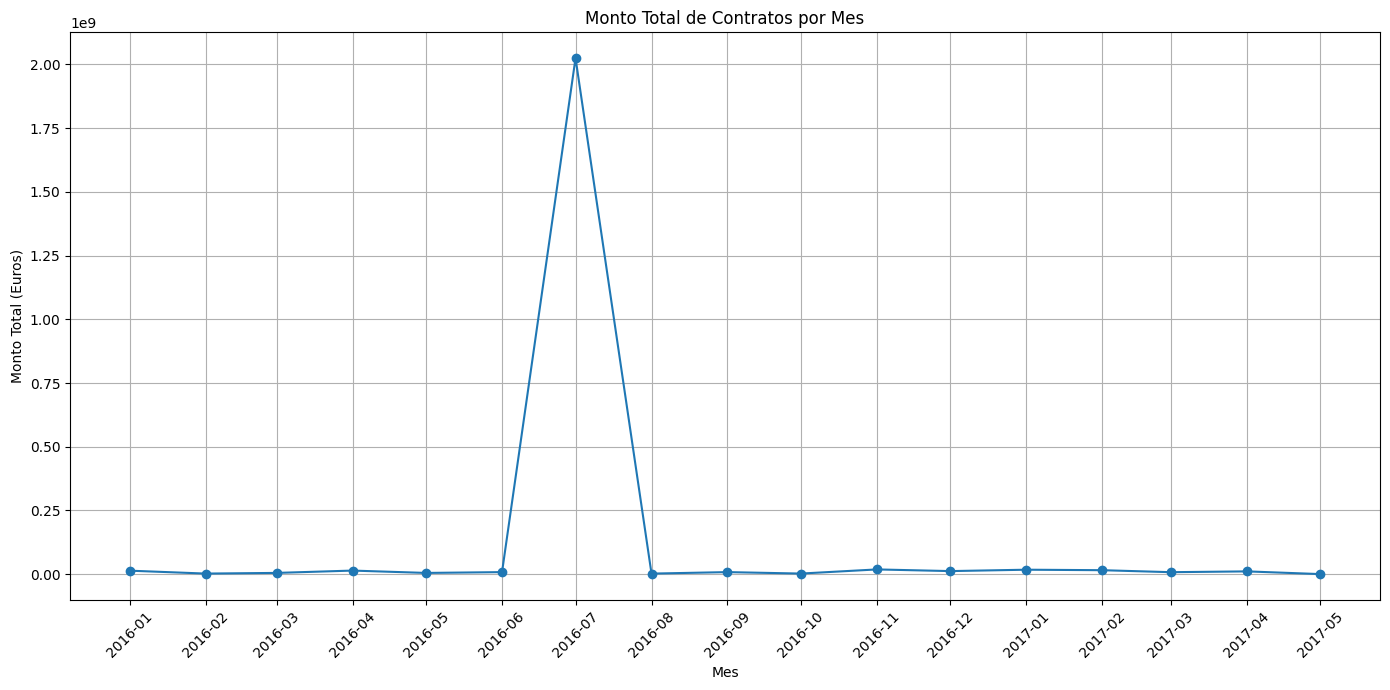

In [14]:

# Agrupar los datos por mes y sumar los montos de los contratos por mes
monthly_amounts = data.groupby(data['mm_yyyy'].dt.to_period('M'))['amount'].sum().sort_index()

# Convertir a un formato que permita graficar
monthly_amounts = monthly_amounts.to_timestamp()

# Graficar los montos de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

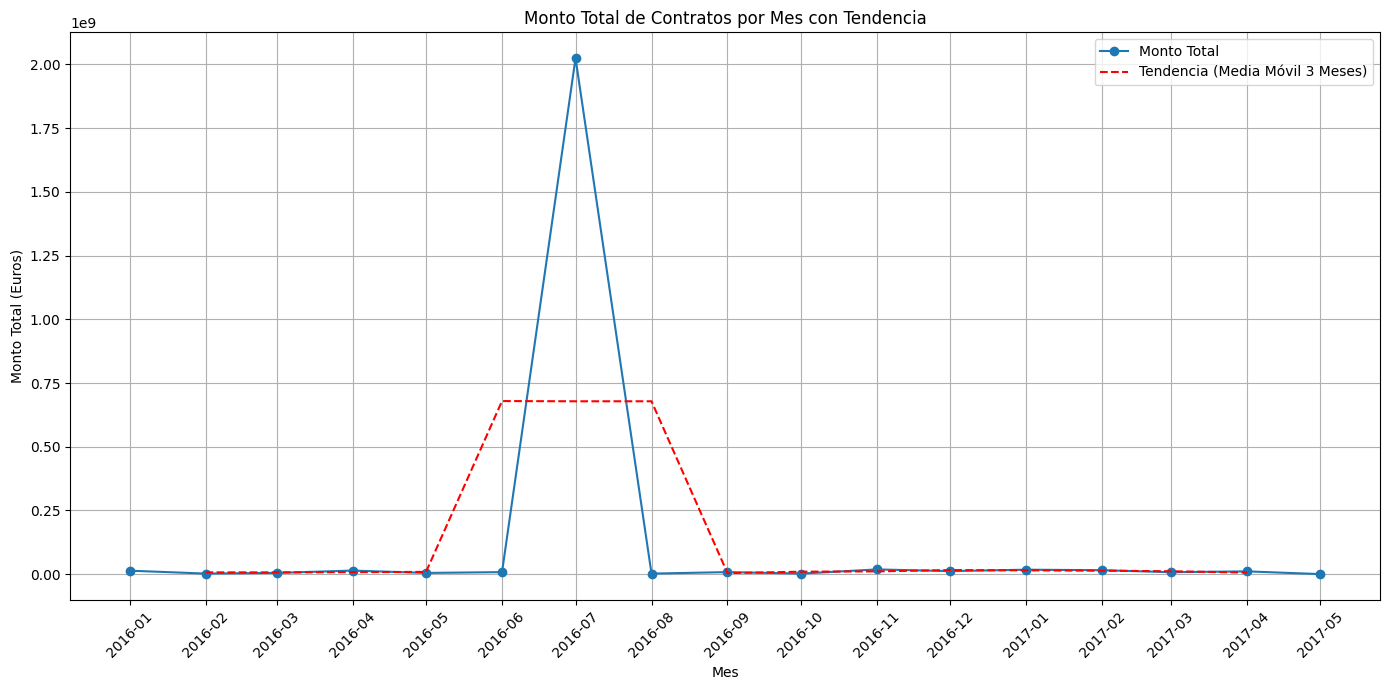

In [15]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_amounts_rolling = monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(monthly_amounts_rolling.index, monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Resumen estadístico de los montos de contratos por mes
monthly_amounts.describe()

count    1.700000e+01
mean     1.277121e+08
std      4.887846e+08
min      4.863631e+05
25%      5.067529e+06
50%      8.276006e+06
75%      1.428489e+07
max      2.024347e+09
Name: amount, dtype: float64

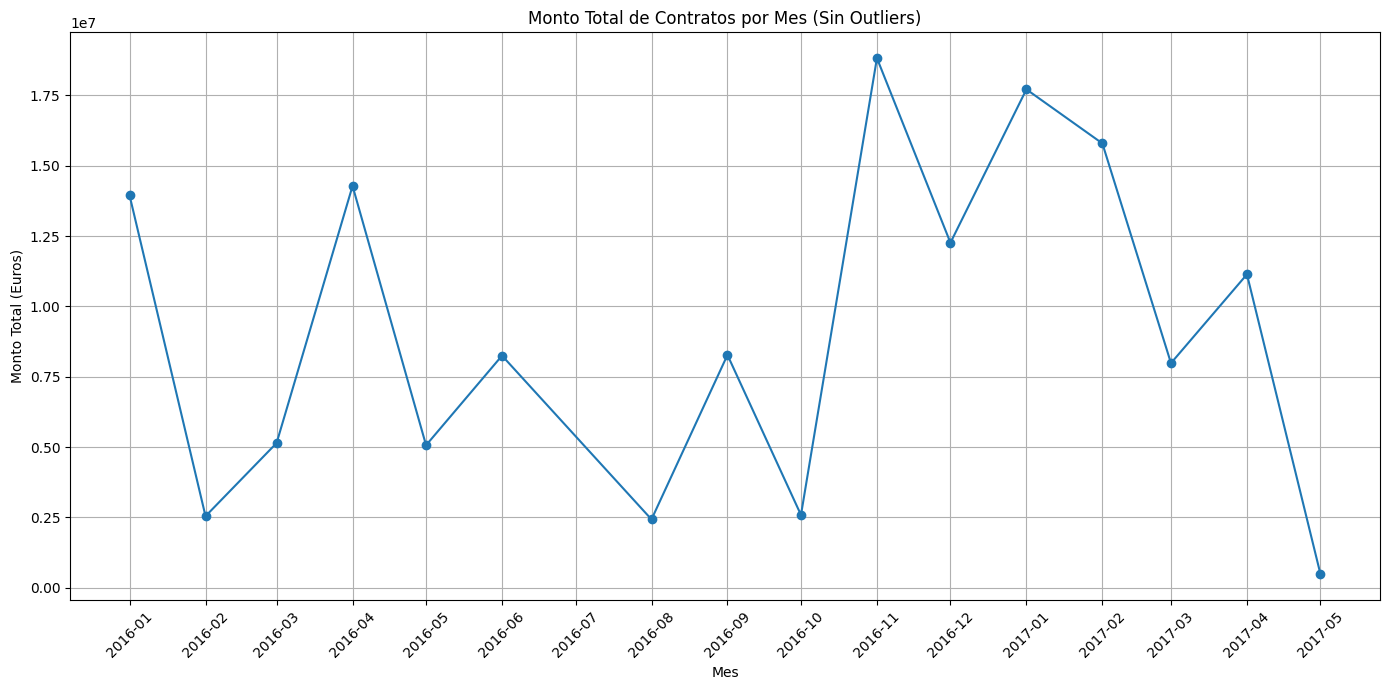

In [17]:
# Identificar y eliminar el outlier
# Calcular el percentil 99 para identificar el outlier
percentile_99_amount = np.percentile(monthly_amounts, 99)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_monthly_amounts = monthly_amounts[monthly_amounts <= percentile_99_amount]

# Graficar los montos de contratos por mes sin el outlier
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

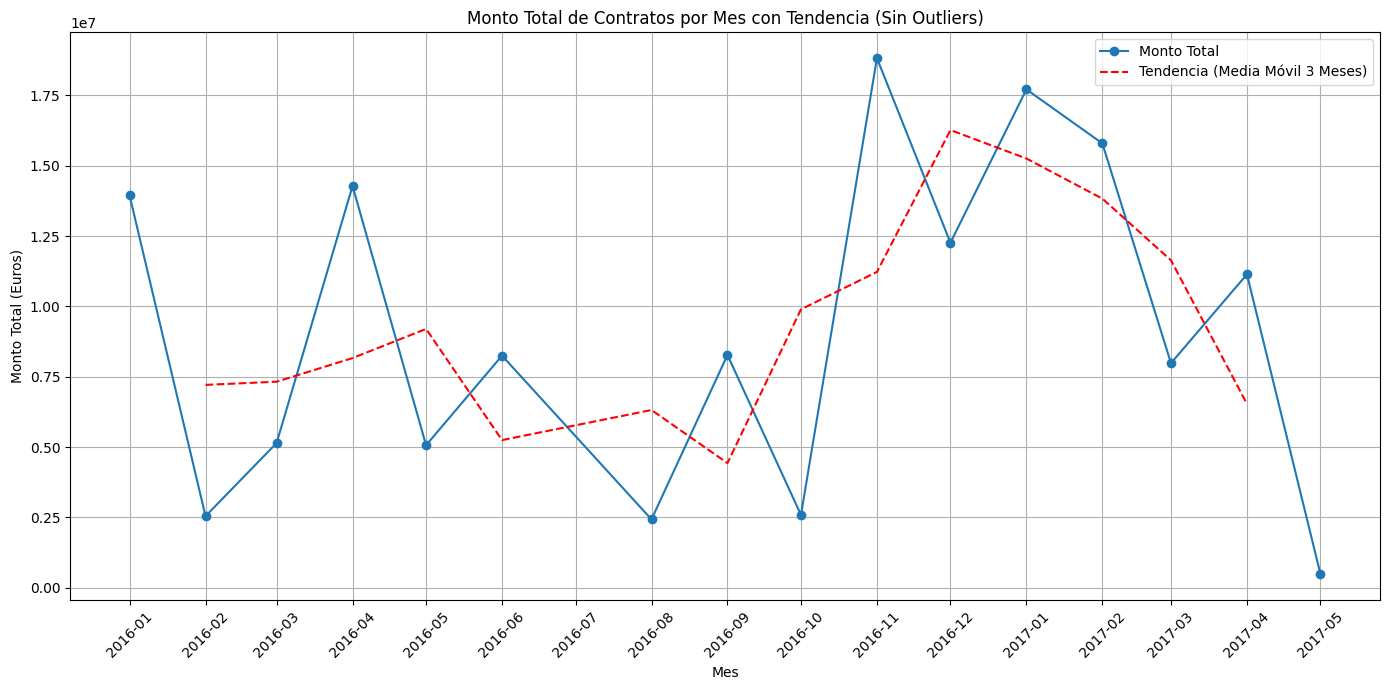

In [18]:
# Agregar una tendencia utilizando una media móvil de 3 meses
filtered_monthly_amounts_rolling = filtered_monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(filtered_monthly_amounts_rolling.index, filtered_monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# Resumen estadístico de los montos de contratos por mes sin outlier
filtered_monthly_amounts.describe()

count    1.600000e+01
mean     9.172415e+06
std      5.869575e+06
min      4.863631e+05
25%      4.447870e+06
50%      8.263852e+06
75%      1.403203e+07
max      1.882766e+07
Name: amount, dtype: float64

# Compare llama3 and phi3

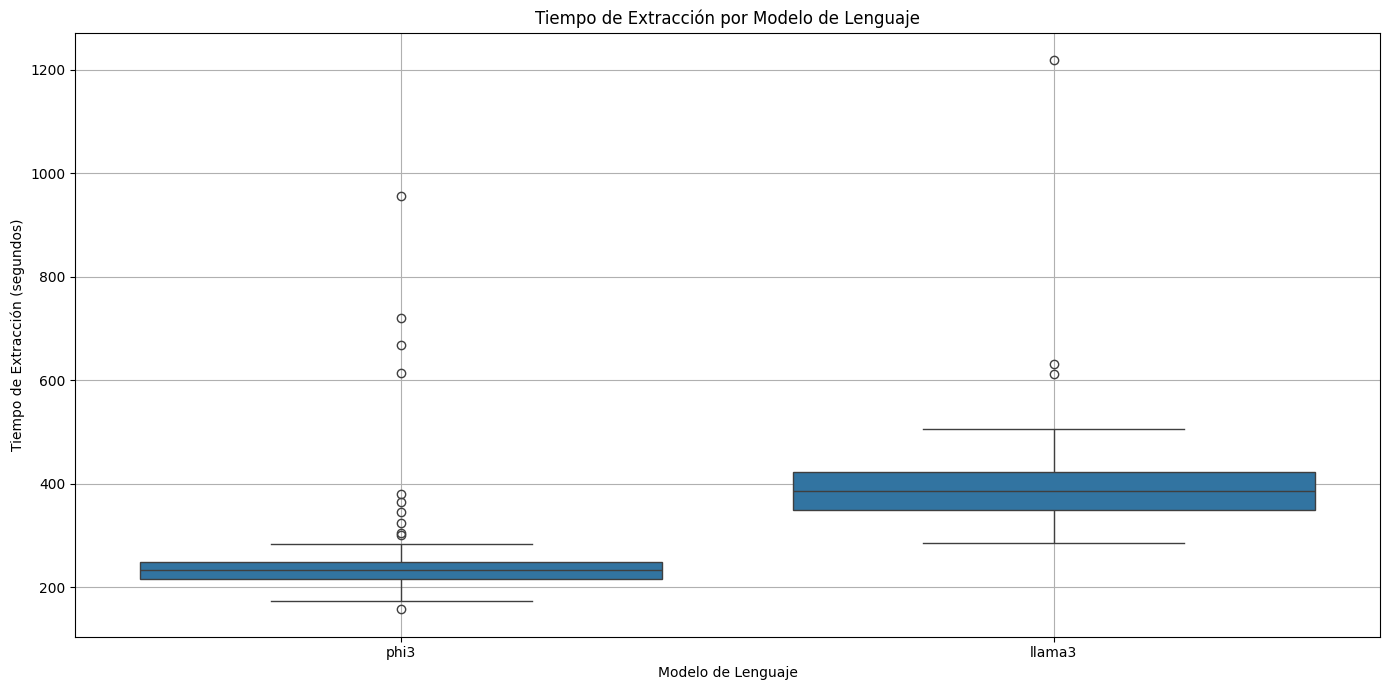

In [21]:
# Calcular la estadística descriptiva del tiempo por modelo
model_time_stats = data.groupby('model')['time'].describe()

# Graficar el tiempo promedio de extracción por modelo de lenguaje
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data)
plt.title('Tiempo de Extracción por Modelo de Lenguaje')
plt.xlabel('Modelo de Lenguaje')
plt.ylabel('Tiempo de Extracción (segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Mostrar las estadísticas de tiempo por modelo
model_time_stats

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
llama3,61.0,403.113115,124.364419,286.47,348.960,385.42,423.19,1218.23
phi3,75.0,263.082400,123.842299,157.45,216.085,233.34,249.26,956.01


In [24]:
from scipy.stats import shapiro, normaltest, anderson

# Prueba de Shapiro-Wilk para distribución normal
shapiro_llama3 = shapiro(data[data['model'] == 'llama3']['time'])
shapiro_phi3 = shapiro(data[data['model'] == 'phi3']['time'])

# Mostrar resultados de las pruebas
shapiro_results = {
    'llama3': {'Statistic': shapiro_llama3[0], 'p-value': shapiro_llama3[1]},
    'phi3': {'Statistic': shapiro_phi3[0], 'p-value': shapiro_phi3[1]}
}

shapiro_results

{'llama3': {'Statistic': np.float64(0.5429638421733947),
  'p-value': np.float64(1.703480234807714e-12)},
 'phi3': {'Statistic': np.float64(0.4965208860528969),
  'p-value': np.float64(1.2799999909973756e-14)}}

No siguen una normal ninguno de los dos

In [25]:
from scipy.stats import ks_2samp

# Realizar la prueba de Kolmogorov-Smirnov para comparar las distribuciones de tiempo entre los dos modelos
ks_test_result = ks_2samp(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Mostrar resultados de la prueba
ks_test_result

KstestResult(statistic=np.float64(0.8666666666666667), pvalue=np.float64(1.0005732987888834e-26), statistic_location=np.float64(283.19), statistic_sign=np.int8(-1))

pvalor p-valor: 1.0006e-26 La prueba de Kolmogorov-Smirnov sugiere que los tiempos de extracción para los modelos llama3 y phi3 no siguen la misma distribución.

In [27]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Wilcoxon-Mann-Whitney para comparar las medianas de los tiempos de extracción entre los dos modelos
wilcoxon_result = mannwhitneyu(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'], alternative='two-sided')

# Mostrar resultados de la prueba
wilcoxon_result

MannwhitneyuResult(statistic=np.float64(4259.0), pvalue=np.float64(6.451318428544051e-18))

p-valor: 6.4513e-18 La prueba de Wilcoxon-Mann-Whitney sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [28]:
from scipy.stats import kruskal

# Realizar la prueba de Kruskal-Wallis para comparar las medianas de los tiempos de extracción entre los dos modelos
kruskal_result = kruskal(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Mostrar resultados de la prueba
kruskal_result

KruskalResult(statistic=np.float64(74.41545530692832), pvalue=np.float64(6.3291558120391946e-18))

La prueba de Kruskal-Wallis sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes